# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from api_keys import api_key


# Import API key
#import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

642

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
count = 1
City = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_Temp = []
Wind_Speed = []
            
for city in cities:
    try:
        query_url = url + "appid=" + api_key + "&units=" + units + "&q=" + city
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()     
        City.append(weather_json['name'])
        Cloudiness.append(weather_json['clouds']['all'])
        Country.append(weather_json['sys']['country'])
        Date.append(weather_json['dt'])
        Humidity.append(weather_json['main']['humidity'])
        Lat.append(weather_json['coord']['lat'])
        Lng.append(weather_json['coord']['lon'])
        Max_Temp.append(weather_json['main']['temp_max'])
        Wind_Speed.append(weather_json['wind']['speed'])
        print(f"{count} {city}")
        count = count + 1
    except KeyError:
        print(f"{city} does not exist")
        
    time.sleep(1)
    

1 kununurra
2 tendukheda
3 hermanus
4 castro
5 alofi
6 troitsko-pechorsk
7 lagoa
8 tevaitoa
9 amahai
10 bambous virieux
11 ribeira grande
12 provideniya
13 hobart
14 rikitea
saleaula does not exist
15 aranos
16 arraial do cabo
taolanaro does not exist
17 vila franca do campo
18 aanekoski
19 cape town
20 georgetown
21 bluff
22 vao
23 lebu
24 henties bay
25 puerto ayora
26 korem
27 simpang
illoqqortoormiut does not exist
28 goianesia
29 bredasdorp
30 roebourne
tsihombe does not exist
31 tuy hoa
32 yellowknife
33 saint-philippe
34 bilibino
35 mataura
36 pirae
37 albany
one hundred mile house does not exist
38 hambantota
39 hilo
40 mar del plata
41 portland
42 mount gambier
43 khargapur
44 oriximina
45 seoul
46 punta arenas
47 khatanga
48 clyde river
49 maltahohe
50 guaira
51 lorengau
52 busselton
53 katsuura
54 cockburn town
55 ushuaia
56 cherskiy
57 conneaut
58 saskylakh
59 airai
jujuy does not exist
60 marystown
61 new norfolk
62 jamestown
63 lompoc
64 touros
vaitupu does not exist
65 b

517 laela
518 pinheiro
519 faya
520 klamath falls
521 vilhena
522 wembley
523 semey
524 serebryansk
palabuhanratu does not exist
525 mazatlan
526 dongying
527 phan thiet
528 noumea
529 pahrump
530 petropavlovsk-kamchatskiy
531 dudinka
532 lasa
533 tiarei
534 lingao
535 camacha
536 pangkalanbuun
537 izvestkovyy
538 laguna
539 wenling
540 coos bay
541 tessalit
542 groningen
543 ambilobe
544 lianran
545 kudahuvadhoo
546 okakarara
547 petrykivka
548 hoquiam
549 opunake
550 souillac
551 manono
552 nacala
553 otane
554 rocha
555 cascais
556 palmer
557 pombas
558 yangambi
559 victor harbor
560 moranbah
khonuu does not exist
561 khani
562 altus
563 shieli
564 altay
565 tirau
566 dali
567 walvis bay
568 diego de almagro
569 burns lake
570 lewistown
571 dicabisagan
572 el pedernal
573 chekhov
574 kimberley
575 kochubey
576 batagay
577 jaragua do sul
578 zhumadian
579 shahdadkot
580 vostok


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_dict = {
    "City": City,
    "Cloudiness": Cloudiness,
    'Date': Date,
    'Humidity': Humidity,
    "Lat": Lat,
    "Lng": Lng,
    "Max Temp": Max_Temp,
    "Wind Speed": Wind_Speed
}
weather_data = pd.DataFrame(weather_dict)

In [5]:
weather_data.to_csv("weather_data.csv", encoding="utf-8", index=False)

In [6]:
weather_data.head()

,City,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Kununurra,48,1552172400,100,-15.77,128.74,78.80,3.36
1,Tendukheda,0,1552173360,57,23.40,79.54,56.78,3.38
2,Hermanus,64,1552173342,82,-34.42,19.24,69.01,4.00
3,Castro,0,1552172400,52,-42.48,-73.76,64.40,5.82
4,Alofi,92,1552168800,70,-19.06,-169.92,86.00,12.75


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

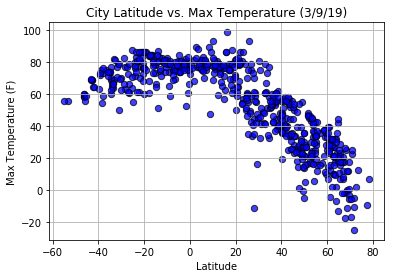

In [26]:
plt.scatter(Lat, Max_Temp, marker="o", facecolors="blue", edgecolors="black",
            s=40, alpha=0.75,)
plt.title("City Latitude vs. Max Temperature (3/9/19)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("lattemp.png")

#### Latitude vs. Humidity Plot

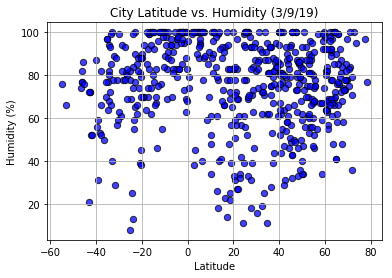

In [27]:
plt.scatter(Lat, Humidity, marker="o", facecolors="blue", edgecolors="black",
            s=40, alpha=0.75,)
plt.title("City Latitude vs. Humidity (3/9/19)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("lathumid.png")

#### Latitude vs. Cloudiness Plot

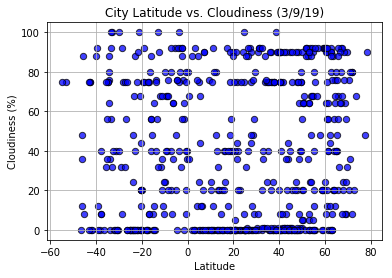

In [28]:
plt.scatter(Lat, Cloudiness, marker="o", facecolors="blue", edgecolors="black",
            s=40, alpha=0.75,)
plt.title("City Latitude vs. Cloudiness (3/9/19)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("latcloud.png")

#### Latitude vs. Wind Speed Plot

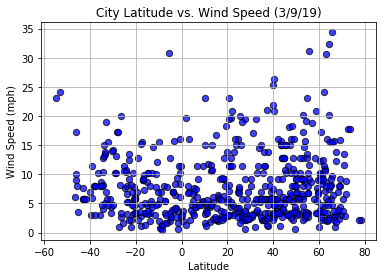

In [29]:
plt.scatter(Lat, Wind_Speed, marker="o", facecolors="blue", edgecolors="black",
            s=40, alpha=0.75,)
plt.title("City Latitude vs. Wind Speed (3/9/19)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("latwind.png")